# Date-A-Scientist Portfolio Project


## Introduction

### Project Goals
The goal of this project is to investigate whether the information OK-Cupid currently has on the profile can be used to accurately predict a users astrological sign, given the importance of these signs and their matches in dating. 
### Data
The data (`profiles.csv`) was provided by [codecademy.com](http://www.codecademy.com/)
### Analysis

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('profiles.csv', encoding='utf-8')
print(data.head())
print(data.isnull().sum())

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

## Scoping

#### Columns
* age: continuous numerical variable for age of the user 
* body_type: categorical variable of body type 
* diet: categorical variable of diet 
* drinks: categorical variable of drinking frequency
* drugs: categorical variable of drug-use frequency
* education: categorical variable describing level of education
* ethnicity: categorical variable decribing ethnicity
* height: continuous variable for the heigh of the user
* income: continuous variable for the income
* job: categorical variable for the persons job
* last_online: date variable of their last login
* location: categorical variable for users location
* offspring: categorical variable describing offspring situation
* orientation: categorical variable describing sexual orientation
* pets: categorical variable describing users pets situation
* religion: categorical variable describing users religious beliefs
* sex: categorical variable describing sex (m or f)
* sign: categorical variable describing users sign
* smokes: categorical variable describing smoking habits
* speaks: categorical variable including all languages spoken
* status: categorical variable describing users relationship status

##### Essay Questions (thoughts)
* essay0: About Me
* essay1: What are you doing with your life?
* essay2: What are you good at?
* essay3: Some physical description
* essay4: Books and movies
* essay5: Favorite things
* essay6: What do you think about
* essay7: What do you do on a day off
* essay8: funny story??
* essay9: What I'm looking for?

**Observations**
- Very heavily categorical data(drinks, drugs, smokes, orientation and status looks like they can be converted to ordinal data for an ML algorithm).
- If we believe education is an input variable, we could convert it using a dummy variable of {'graduated from college/university': 1, 'other': 0}
- A decision tree model will likely be necessary if the body_type, offspring, pets, location column is used. No obvious order that you could list those in.
- Essays are as follows - {0: About Me, 1: Professional Life, 2: Social Life/Habits, 3: Your Flaw}
- We can remap m/f to 0/1 for numerical data uses
- Speaks can be remapped using a lambda function to count commas (+1 = languages spoken)

**Model Possibilities**
- A random forest model could be used to predict the question of astrological sign

## Cleaning lables for ML

On inspection, all of the signs START with the sign of the person but can have additional information after that. We'll create a column within the data that will have this cleaned sign data.

gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
libra but it doesn&rsquo;t matter                1408
aquarius but it doesn&rsquo;t matter             1408
capricorn and it&rsquo;s fun

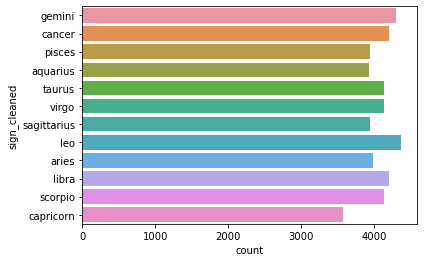

In [42]:
print(data.sign.value_counts())
data['sign_cleaned'] = data.sign.str.split(' ').str.get(0)
print(data.sign_cleaned.value_counts())

sns.countplot(data=data, y='sign_cleaned')
plt.show()

## Deciding Input Variables

To get a sense for what convention deems as predictable traits of an astrological sign, I compliled the astrological sign traits as listed by [cosmopolitan.com](https://www.cosmopolitan.com/uk/entertainment/horoscopes-monthly/a27254701/gemini-traits/). Their traits wills serve as a test for whether the anecdotal theory of astrological sign personalities can be proved by data.

**Example traits of a Gemini from Cosmopolitan**
- Smart (will use education for this, and convert to dummies)
- Party too much (will use drinking and drugs frequency as dummy variables)
- Some physical descriptors (will use body_type as a dummy variable)
- Personality would affect job (will use job dummy variable)

**Other traits to include**
- diet (modeler choice to include on premise that this is affected by personality)
- pets ("")
- religion ("")

In [45]:
cols = ['education', 'drinks', 'drugs', 'body_type', 'job', 'diet', 'pets', 'religion', 'sign_cleaned']

## Checking distributions of all of our columns

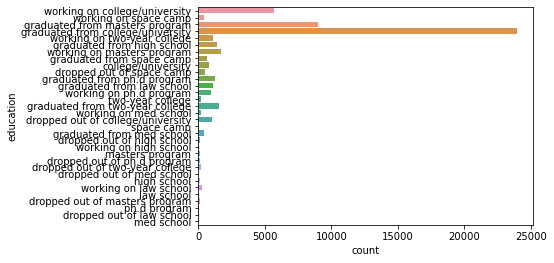

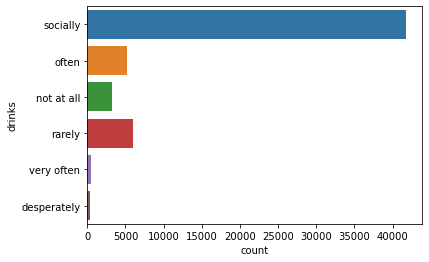

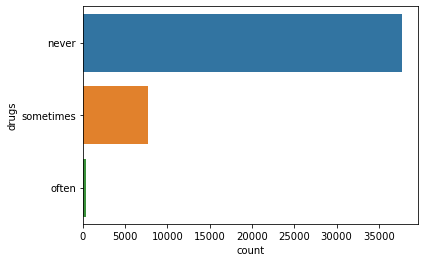

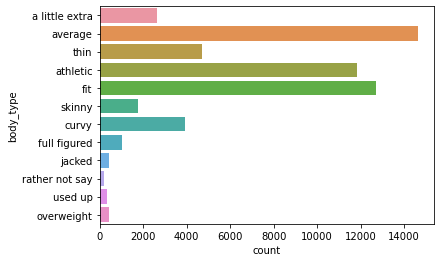

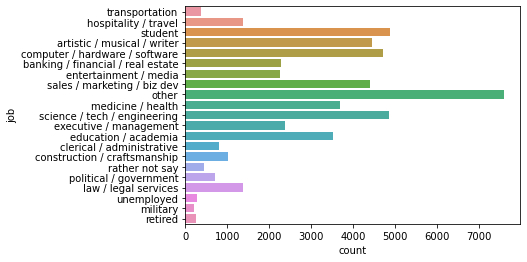

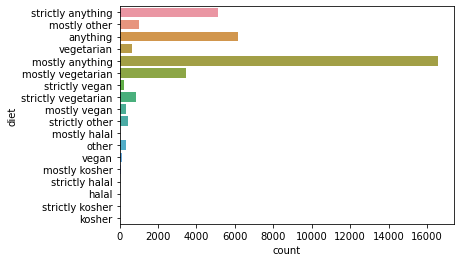

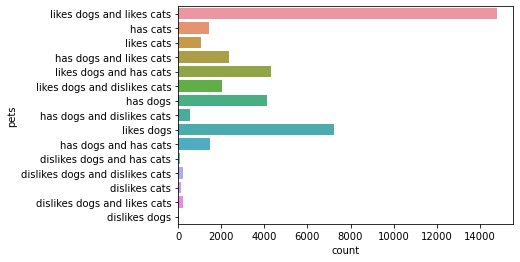

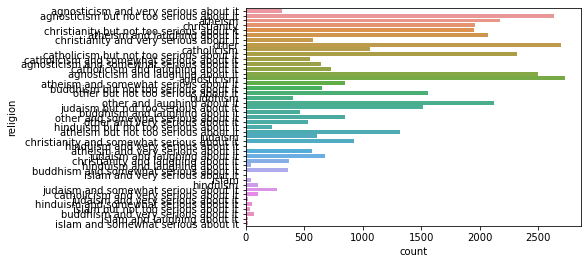

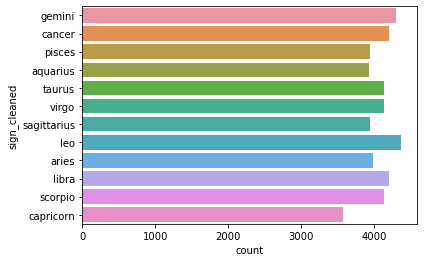

In [46]:
for col in cols:
    sns.countplot(data=data, y=col)
    plt.show()

## Preparing Data for ML

Below we drop all of the categories that do not have an answer for one of the predetermined columns. Upon check, we were still left with 12,681 data point for the algorithm to parse through. Being satisfied with that data, the columns (aside from sign_cleaned) were all converted to dummies using pandas 'get_dummies' function. This leaves our algorithm with 152 columns given the inputs we chose.

In [58]:
ml_data = data[cols].dropna()
for col in cols[:-1]:
    ml_data = pd.get_dummies(ml_data, prefix=col, columns=[col])

print(ml_data.head())
print(len(ml_data))

labels = ml_data[['sign_cleaned']]
variables = ml_data.iloc[:,1:]

   sign_cleaned  education_college/university  \
0        gemini                             0   
1        cancer                             0   
7   sagittarius                             0   
9        cancer                             0   
11          leo                             0   

    education_dropped out of college/university  \
0                                             0   
1                                             0   
7                                             0   
9                                             0   
11                                            0   

    education_dropped out of high school  education_dropped out of law school  \
0                                      0                                    0   
1                                      0                                    0   
7                                      0                                    0   
9                                      0                                  

## Creating the Decision Tree

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(variables, labels, random_state=1, test_size=0.2)

# converting to 1d array
train_labels = np.array(train_labels).ravel()
test_labels = np.array(test_labels).ravel()

print(train_data)
print(train_labels)

forest = RandomForestClassifier()
forest.fit(train_data, train_labels)

       education_college/university  \
50368                             0   
51898                             0   
30351                             0   
53117                             0   
34357                             0   
...                             ...   
51902                             0   
4177                              0   
24383                             0   
57470                             0   
1067                              0   

       education_dropped out of college/university  \
50368                                            0   
51898                                            0   
30351                                            0   
53117                                            0   
34357                                            0   
...                                            ...   
51902                                            0   
4177                                             0   
24383                                        

RandomForestClassifier()

## Checking the accuracy and confusion Matrix

In [114]:
from sklearn import metrics

predictions = forest.predict(test_data)
score = metrics.accuracy_score(test_labels, predictions)
print(score)

0.08947575877020103


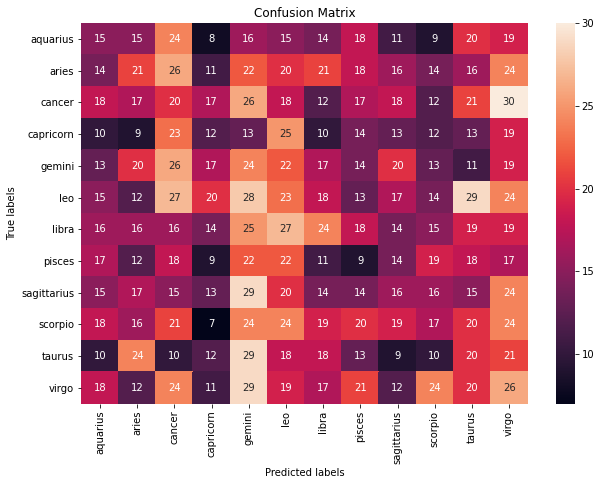

In [116]:
from sklearn.metrics import confusion_matrix

forest_cm = confusion_matrix(test_labels, predictions)
forest_labels = forest.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(forest_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(forest_labels); 
ax.yaxis.set_ticklabels(forest_labels);

## Thoughts moving forward

This model turned out a rounded `9%` success rate which is pretty terrible, but tells you that initial thoughts on astrological signs are just that. Moving forward, a few changes:

* Change the cols that are used above to attempt a better relationship between items
* Change the depth of the forest to see if it is going too deep with 150 inputs. We can graph this on a score plot.
* It may help to use a KNeighbors algorithm, as perhaps similar signs have similar arrays for their interests


**As a note**
* In the solution data we're given Sex as an input variable. 